# Bridget Hansen - Project Analysis 

In [362]:
#Importing the necessarcy packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Reading In DataFrame and Checking Data Types

In [365]:
#Reading in merged data frame
df = pd.read_csv('election_results_with_county_fuel_and_pop.csv', encoding = 'utf-8')
df

,state,county,trump votes,clinton votes,total votes,trump vote %,clinton vote %,electric vehicle %,population,voter turnout %
0,alabama,Jefferson,134768,156873,291641,46.21,53.79,0.757062,660343.0,44.165078
1,alabama,Mobile,95116,72186,167302,56.85,43.15,0.629073,414945.0,40.319078
2,alabama,Madison,89520,62822,152342,58.76,41.24,1.131481,356729.0,42.705247
3,alabama,Shelby,73020,22977,95997,76.06,23.94,1.035096,211282.0,45.435484
4,alabama,Montgomery,34003,58916,92919,36.59,63.41,0.568207,227170.0,40.902848
...,...,...,...,...,...,...,...,...,...,...
2921,wyoming,Crook,3348,273,3621,92.46,7.54,0.195534,7499.0,48.286438
2922,wyoming,Washakie,2911,532,3443,84.55,15.45,0.467190,8165.0,42.167789
2923,wyoming,Weston,3033,299,3332,91.03,8.97,0.457854,7220.0,46.149584
2924,wyoming,Hot Springs,1939,400,2339,82.90,17.10,0.775054,4654.0,50.257843


In [367]:
#Verifying data types 
df.dtypes

state                  object
county                 object
trump votes             int64
clinton votes           int64
total votes             int64
trump vote %          float64
clinton vote %        float64
electric vehicle %    float64
population            float64
voter turnout %       float64
dtype: object

In [369]:
#Changing state and county to a category
df['state'] = df['state'].astype('category')
df['county'] = df['county'].astype('category')

## Exploratory Data Analysis on different Columns

In [372]:
# use the .describe() function
descriptive_stats = df["electric vehicle %"].describe()

# descriptive statistics
print(descriptive_stats)


count    2926.000000
mean        0.728087
std         0.643668
min         0.000000
25%         0.372809
50%         0.546851
75%         0.870329
max         9.062590
Name: electric vehicle %, dtype: float64


In [374]:
# use the .describe() function
descriptive_stats = df["trump vote %"].describe()

# descriptive statistics
print(descriptive_stats)

count    2926.000000
mean       63.627625
std        19.106342
min         8.760000
25%        50.785000
50%        69.025000
75%        78.587500
max        96.750000
Name: trump vote %, dtype: float64


In [376]:
# use the .describe() function
descriptive_stats = df["clinton vote %"].describe()

# descriptive statistics
print(descriptive_stats)

count    2926.000000
mean       36.372375
std        19.106342
min         3.250000
25%        21.412500
50%        30.975000
75%        49.215000
max        91.240000
Name: clinton vote %, dtype: float64


## Plotting Electric Vehicle Distribution 

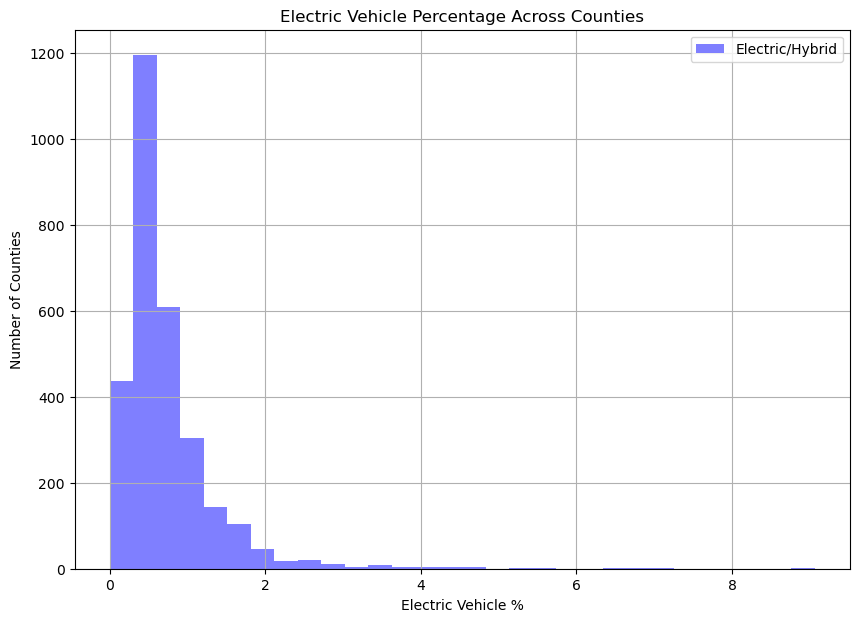

In [379]:
# Making histogram
plt.figure(figsize=(10,7))

plt.hist(df['electric vehicle %'], bins=30, alpha=0.5, label='Electric/Hybrid', color='blue')

# Labels and title
plt.xlabel('Electric Vehicle %')
plt.ylabel('Number of Counties')
plt.title('Electric Vehicle Percentage Across Counties')
plt.legend()
plt.grid(True)

plt.show()

## Analysis Question 1 - Is there a correlation between the number of electric and hybrid vehicles registered in a county and the percentage of votes cast for Hillary Clinton in the 2016 Presidential Election?

### Using Pearson Correlation Coefficent

In [383]:
# calculate Pearson correlation between 'CreditScore' and 'HomeAge'
pearson_corr = df["electric vehicle %"].corr(df["clinton vote %"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

Pearson Correlation: 0.1863
Interpretation: No or weak linear correlation.


### Testing if Correlation is significant

In [386]:
# perform the Pearson correlation test
corr_stat, p_value = pearsonr(df["electric vehicle %"], df["clinton vote %"])

# display the correlation statistic and p-value
print(f"Pearson Correlation Coefficient: {corr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# interpretation based on p-value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")

Pearson Correlation Coefficient: 0.1863
P-value: 0.0000
Reject H0: Significant correlation exists (correlation != 0).


### Plotting a Scatter Plot With Regression Line 

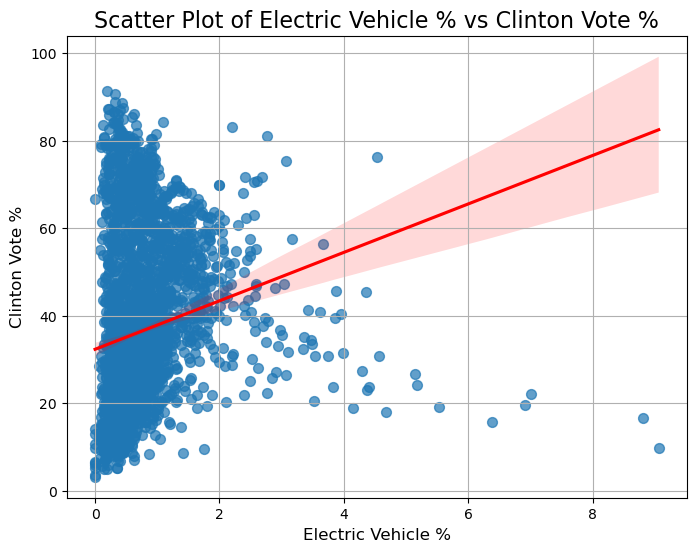

In [391]:
#Displaying A Scatter Plot
plt.figure(figsize=(8, 6))
sns.regplot(
    x="electric vehicle %", 
    y="clinton vote %", 
    data=df,
    scatter_kws={"s": 50, "alpha": 0.7},
    line_kws={"color": "red"},
)

plt.xlabel("Electric Vehicle %", fontsize=12)
plt.ylabel("Clinton Vote %", fontsize=12)
plt.title("Scatter Plot of Electric Vehicle % vs Clinton Vote %", fontsize=16)
plt.grid(True)
plt.show()

## Question 1 Continued - Using Linear Regression

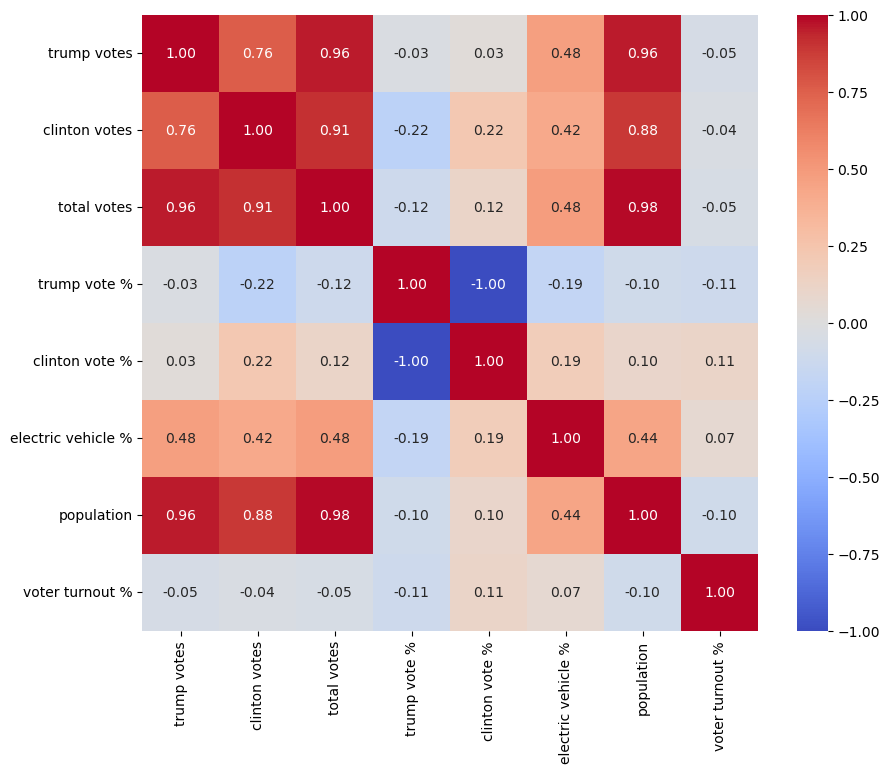

In [394]:
# Plotting a Correlation Matrix for Machine learning 
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns = ['state','county']).corr(), annot=True, fmt=".2f", cmap ='coolwarm', square=True)
plt.show()

### Using Linear Regression With Train Test Split with only EV % as predictor

In [397]:
#Doing Linear regression with train test split and only one X Variable
X = df[["electric vehicle %"]]
y = df["clinton vote %"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
r2 = lin_reg.score(X_test, y_test)
print(f"The linear regression r-squared value is: {r2:.4f}.")

The linear regression r-squared value is: 0.0620.


### Doing Ridge and Lasso With Only Ev% as predictor

In [400]:
#Also doing ridge regression with one X variable
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_r2 = ridge.score(X_test, y_test)  # R²

# lasso regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_r2 = lasso.score(X_test, y_test)  # R²
print(f"The ridge regression r-squared value is: {ridge_r2:.4f}")
print(f"The lasso regression r-quared value is: {lasso_r2:.4f}")

The ridge regression r-squared value is: 0.0619
The lasso regression r-quared value is: 0.0618


### Linear Regression With Two X variables (EV% and total Votes)

In [403]:
#Adding more x variables for linear
X = df[["electric vehicle %",'total votes']]
y = df["clinton vote %"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
r2 = lin_reg.score(X_test, y_test)
print(f"The linear regression r-squared value is: {r2:.4f}.")

The linear regression r-squared value is: 0.0647.


In [405]:
#Also doing ridge regression with two X variables
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_r2 = ridge.score(X_test, y_test) 

# lasso regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_r2 = lasso.score(X_test, y_test) 
print(f"The ridge regression r-squared value is: {ridge_r2:.4f}")
print(f"The lasso regression r-quared value is: {lasso_r2:.4f}")

The ridge regression r-squared value is: 0.0647
The lasso regression r-quared value is: 0.0645


## Machine Learning Logistic Regression - Question 2 Can the distribution of electric vehicle % in a county be used to predict which presidential candidate won that county in the 2016 election?

In [408]:
# Create 'winner' column: 1 if Clinton wins, 0 if Trump wins
df['winner'] = np.where(
    df['clinton votes'] > df['trump votes'], 1, 0
)

# Display the counts of winner
print(df['winner'].value_counts())

winner
0    2218
1     708
Name: count, dtype: int64


In [410]:
#Verifying if winner column was added correctly
df

,state,county,trump votes,clinton votes,total votes,trump vote %,clinton vote %,electric vehicle %,population,voter turnout %,winner
0,alabama,Jefferson,134768,156873,291641,46.21,53.79,0.757062,660343.0,44.165078,1
1,alabama,Mobile,95116,72186,167302,56.85,43.15,0.629073,414945.0,40.319078,0
2,alabama,Madison,89520,62822,152342,58.76,41.24,1.131481,356729.0,42.705247,0
3,alabama,Shelby,73020,22977,95997,76.06,23.94,1.035096,211282.0,45.435484,0
4,alabama,Montgomery,34003,58916,92919,36.59,63.41,0.568207,227170.0,40.902848,1
...,...,...,...,...,...,...,...,...,...,...,...
2921,wyoming,Crook,3348,273,3621,92.46,7.54,0.195534,7499.0,48.286438,0
2922,wyoming,Washakie,2911,532,3443,84.55,15.45,0.467190,8165.0,42.167789,0
2923,wyoming,Weston,3033,299,3332,91.03,8.97,0.457854,7220.0,46.149584,0
2924,wyoming,Hot Springs,1939,400,2339,82.90,17.10,0.775054,4654.0,50.257843,0


## Logistic Regression Baseline - Only EV%

Intercept: -1.1289
Coefficient: 0.2240
Accuracy: 0.7747
F1 Score baseline: 0.0149
Each 1 standard deviation increase in EV % is associated with a 25.10% change in odds of Clinton winning.


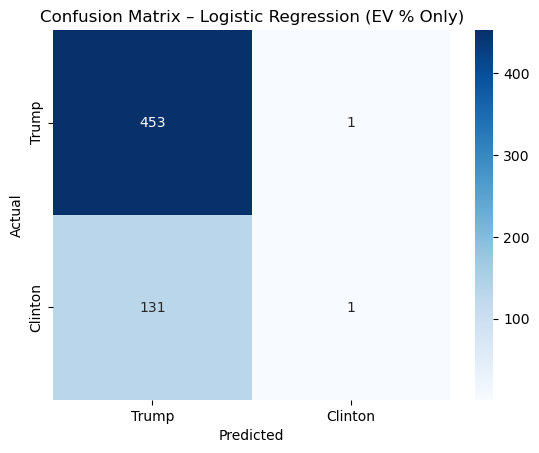

In [413]:
# Baseline model 
X = df[['electric vehicle %']]
y = df['winner']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

#Intercept, Coefficient, Accuracy 
print(f"Intercept: {log_reg.intercept_[0]:.4f}")
print(f"Coefficient: {log_reg.coef_[0][0]:.4f}")
print(f"Accuracy: {log_reg.score(X_test_scaled, y_test):.4f}")

#F1 score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score baseline: {f1:.4f}")

# Odds ratio
coef = log_reg.coef_[0][0]
odds_ratio = np.exp(coef)
print(f"Each 1 standard deviation increase in EV % is associated with a {((odds_ratio - 1) * 100):.2f}% change in odds of Clinton winning.")

# Printing Confusion matrix
cm_base = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Trump", "Clinton"],
            yticklabels=["Trump", "Clinton"])
plt.title("Confusion Matrix – Logistic Regression (EV % Only)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Logistic Regression with EV% and Total Votes as a Predictor

In [446]:
#Including more predictor variable
X = df[['electric vehicle %', 'total votes']]
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(f"Intercept: {log_reg.intercept_[0]:.4f}")
print(f"Coefficient for EV %: {log_reg.coef_[0][0]:.4f}")
print(f"Accuracy: {log_reg.score(X_test, y_test):.4f}")
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score, more predictors: {f1:.4f}")

# Odds ratio interpretation
coef = log_reg.coef_[0][0]
odds_ratio = np.exp(coef)
print(f"Each 1% increase in EV adoption is associated with a {((odds_ratio - 1) * 100):.2f}% change in odds of Clinton winning.")

Intercept: -1.3772
Coefficient for EV %: 0.3418
Accuracy: 0.7747
F1 Score, more predictors: 0.0149
Each 1% increase in EV adoption is associated with a 40.75% change in odds of Clinton winning.


### KNN Baseline Model - EV% Only

In [449]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

Accuracy (KNN baseline): 0.7338
The f1 score using KNN is: 0.2121


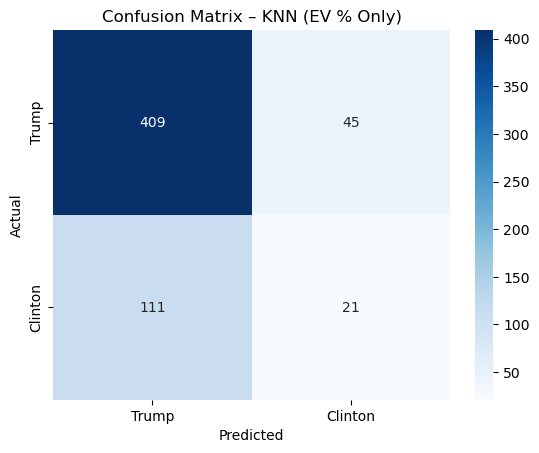

In [451]:
# Baseline model
X = df[['electric vehicle %']]
y = df['winner']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN model (or replace with SVC(kernel='linear') for SVM)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred = knn.predict(X_test_scaled)
print(f"Accuracy (KNN baseline): {knn.score(X_test_scaled, y_test):.4f}")
f1 = f1_score(y_test, y_pred, average='binary')
print(f"The f1 score using KNN is: {f1:.4f}")
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Trump", "Clinton"],
            yticklabels=["Trump", "Clinton"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – KNN (EV % Only)")
plt.show()

### KNN With EV% and Total Votes

Accuracy KNN, multiple predictors: 0.7304
The f1 score using KNN is: 0.2330


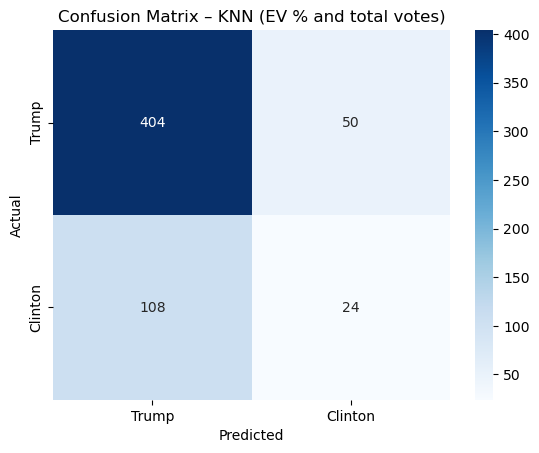

In [454]:
# Expanded Model
X = df[['electric vehicle %', 'total votes']]
y = df['winner']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initlizing KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# PPrinting the accuracy score and f1 score
y_pred = knn.predict(X_test_scaled)
print(f"Accuracy KNN, multiple predictors: {knn.score(X_test_scaled, y_test):.4f}")
f1 = f1_score(y_test, y_pred, average='binary')
print(f"The f1 score using KNN is: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Trump", "Clinton"],
            yticklabels=["Trump", "Clinton"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – KNN (EV % and total votes)")
plt.show()

### SVM Baseline Model - Only EV%

Accuracy baseline model: 0.7747
The f1 score using SVM is: 0.0000


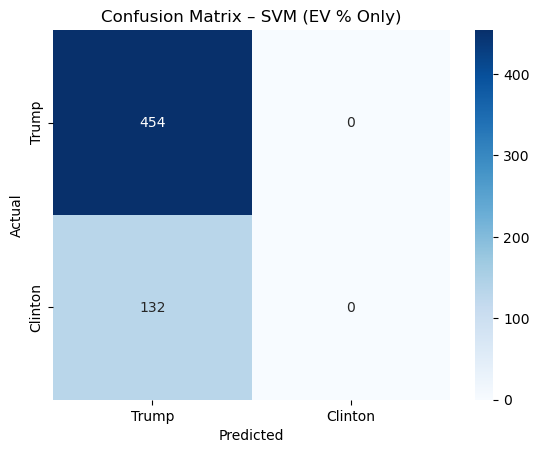

In [473]:
# Baseline model
X = df[['electric vehicle %']]
y = df['winner']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine classifier
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Accuracy
print(f"Accuracy baseline model: {svm_model.score(X_test, y_test):.4f}")
f1 = f1_score(y_test, y_pred, average='binary')
print(f"The f1 score using SVM is: {f1:.4f}")
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Trump", "Clinton"],
            yticklabels=["Trump", "Clinton"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – SVM (EV % Only)")
plt.show()

### SVM With EV% and Total Votes 

In [476]:
# Including more variables with SVM
X = df[['electric vehicle %', 'total votes']]
y = df['winner']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling both features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM model
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred = svm_model.predict(X_test_scaled)

# Accuracy
print(f"Accuracy, with more predictors: {svm_model.score(X_test_scaled, y_test):.4f}")
f1 = f1_score(y_test, y_pred, average='binary')
print(f"The f1 score using SVM is: {f1:.4f}")

Accuracy, with more predictors: 0.7747
The f1 score using SVM is: 0.0000


## Question 3.) 

In [463]:
#Displaying dataframe
df

,state,county,trump votes,clinton votes,total votes,trump vote %,clinton vote %,electric vehicle %,population,voter turnout %,winner
0,alabama,Jefferson,134768,156873,291641,46.21,53.79,0.757062,660343.0,44.165078,1
1,alabama,Mobile,95116,72186,167302,56.85,43.15,0.629073,414945.0,40.319078,0
2,alabama,Madison,89520,62822,152342,58.76,41.24,1.131481,356729.0,42.705247,0
3,alabama,Shelby,73020,22977,95997,76.06,23.94,1.035096,211282.0,45.435484,0
4,alabama,Montgomery,34003,58916,92919,36.59,63.41,0.568207,227170.0,40.902848,1
...,...,...,...,...,...,...,...,...,...,...,...
2921,wyoming,Crook,3348,273,3621,92.46,7.54,0.195534,7499.0,48.286438,0
2922,wyoming,Washakie,2911,532,3443,84.55,15.45,0.467190,8165.0,42.167789,0
2923,wyoming,Weston,3033,299,3332,91.03,8.97,0.457854,7220.0,46.149584,0
2924,wyoming,Hot Springs,1939,400,2339,82.90,17.10,0.775054,4654.0,50.257843,0


In [465]:
df['voter turnout %'].describe()

count    2926.000000
mean       42.053932
std         7.411090
min        13.387081
25%        37.513943
50%        42.329525
75%        47.061655
max        76.851852
Name: voter turnout %, dtype: float64

In [467]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define ev % gorups
bins = [0, 0.4, 0.9, df["electric vehicle %"].max()]
labels = ["Low", "Medium", "High"]
df["ev_group_3"] = pd.cut(df["electric vehicle %"], bins=bins, labels=labels)

# Fitting the ANOVA model
fit = ols('Q("voter turnout %") ~ ev_group_3', data=df).fit()

# Display the ANOVA table
anova_table = sm.stats.anova_lm(fit, typ=2)  # Type 2 ANOVA
print(anova_table)

# Extracting the p-value
p_value = anova_table["PR(>F)"].iloc[0]
print(f"\nP-value: {p_value:.8f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: Voter turnout differs significantly between EV % adoption groups.")
else:
    print("Fail to reject H0: No significant difference in voter turnout across EV % groups.")

                   sum_sq      df          F        PR(>F)
ev_group_3    1806.737353     2.0  16.860762  5.242493e-08
Residual    156019.615312  2912.0        NaN           NaN

P-value: 0.00000005
Reject H0: Voter turnout differs significantly between EV % adoption groups.


In [469]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Remove rows with missing data in relevant columns
df_clean = df.dropna(subset=["voter turnout %", "ev_group_3"])

# Fit the ANOVA model
fit = ols('Q("voter turnout %") ~ ev_group_3', data=df_clean).fit()

# Perform ANOVA to ensure the overall model is significant
anova_table = sm.stats.anova_lm(fit, typ=2)
print(anova_table)

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df_clean["voter turnout %"],    
                          groups=df_clean["ev_group_3"],        
                          alpha=0.05)                            

# Print the summary of the Tukey HSD test
print(tukey.summary())

                   sum_sq      df          F        PR(>F)
ev_group_3    1806.737353     2.0  16.860762  5.242493e-08
Residual    156019.615312  2912.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -2.0814    0.0 -2.9566 -1.2063   True
  High Medium  -1.5968    0.0 -2.3986  -0.795   True
   Low Medium   0.4846 0.2805 -0.2619  1.2312  False
----------------------------------------------------


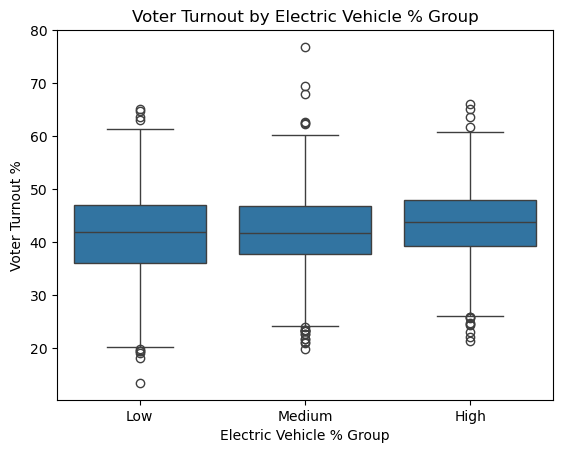

In [471]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='ev_group_3', y='voter turnout %', data=df)
plt.title('Voter Turnout by Electric Vehicle % Group')
plt.xlabel('Electric Vehicle % Group')
plt.ylabel('Voter Turnout %')
plt.show()